In [1]:
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [3]:
df1=pd.read_csv(r"C:\Users\THINKBOOK\Downloads\onlinepaymentfraud\data\PS_20174392719_1491204439457_log.csv")

In [4]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df1.drop(['isFlaggedFraud'], axis=1, inplace=True)

In [7]:
df1["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
fraud = df1[df1['isFraud'] == 1]
legit = df1[df1['isFraud'] == 0]
df = pd.concat([
    fraud,
    legit.sample(n=len(fraud), random_state=42)
])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print(df['isFraud'].value_counts())
print(df.shape)

isFraud
0    8213
1    8213
Name: count, dtype: int64
(16426, 10)


In [9]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,397,CASH_IN,76550.74,C658247527,1096252.93,1172803.66,C492670573,2208784.02,2132233.28,0
1,251,PAYMENT,12617.11,C1812418129,339181.87,326564.76,M1924423059,0.00,0.00,0
2,98,CASH_OUT,8055.06,C1544350298,8055.06,0.00,C912405348,0.00,8055.06,1
3,550,TRANSFER,342309.91,C662184778,342309.91,0.00,C1740503020,0.00,0.00,1
4,586,CASH_OUT,2581549.92,C648614053,2581549.92,0.00,C213455810,0.00,2581549.92,1
...,...,...,...,...,...,...,...,...,...,...
16421,382,CASH_OUT,542461.74,C664480557,0.00,0.00,C1725191429,1757516.20,2299977.94,0
16422,40,CASH_IN,2032.93,C1544432489,7625673.00,7627705.93,C1918821785,323961.50,321928.56,0
16423,484,CASH_OUT,156220.74,C389614238,156220.74,0.00,C643171110,0.00,156220.74,1
16424,71,TRANSFER,1871553.73,C677678546,1871553.73,0.00,C646623849,0.00,0.00,1


In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,397,CASH_IN,76550.74,C658247527,1096252.93,1172803.66,C492670573,2208784.02,2132233.28,0
1,251,PAYMENT,12617.11,C1812418129,339181.87,326564.76,M1924423059,0.00,0.00,0
2,98,CASH_OUT,8055.06,C1544350298,8055.06,0.00,C912405348,0.00,8055.06,1
3,550,TRANSFER,342309.91,C662184778,342309.91,0.00,C1740503020,0.00,0.00,1
4,586,CASH_OUT,2581549.92,C648614053,2581549.92,0.00,C213455810,0.00,2581549.92,1


In [11]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
16421,382,CASH_OUT,542461.74,C664480557,0.00,0.00,C1725191429,1757516.20,2299977.94,0
16422,40,CASH_IN,2032.93,C1544432489,7625673.00,7627705.93,C1918821785,323961.50,321928.56,0
16423,484,CASH_OUT,156220.74,C389614238,156220.74,0.00,C643171110,0.00,156220.74,1
16424,71,TRANSFER,1871553.73,C677678546,1871553.73,0.00,C646623849,0.00,0.00,1
16425,335,CASH_IN,98932.38,C2033626434,1609496.52,1708428.90,C1360574838,3484293.51,3385361.13,0


In [12]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [13]:
df.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.149111,0.074185,-0.022918,-0.006124,0.027531,0.320576
amount,0.149111,1.000000,0.646056,0.123465,0.005105,0.256852,0.345287
oldbalanceOrg,0.074185,0.646056,1.000000,0.824217,0.008734,0.117984,0.125072
newbalanceOrig,-0.022918,0.123465,0.824217,1.000000,0.039598,0.005994,-0.133095
oldbalanceDest,-0.006124,0.005105,0.008734,0.039598,1.000000,0.928051,-0.082357
newbalanceDest,0.027531,0.256852,0.117984,0.005994,0.928051,1.000000,0.004891
isFraud,0.320576,0.345287,0.125072,-0.133095,-0.082357,0.004891,1.000000


<Axes: >

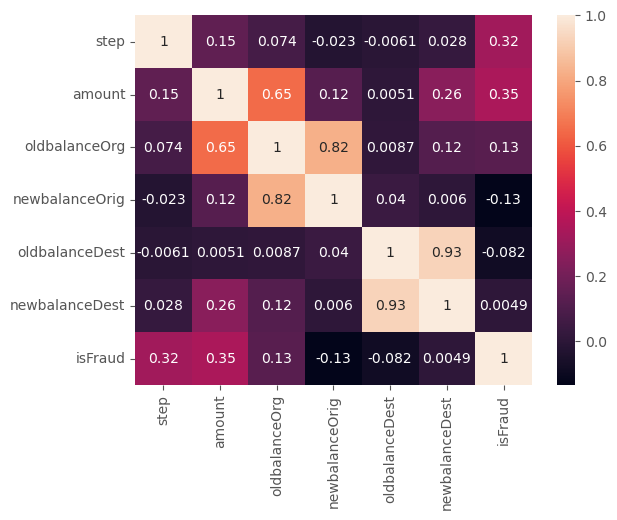

In [14]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='step', ylabel='Count'>

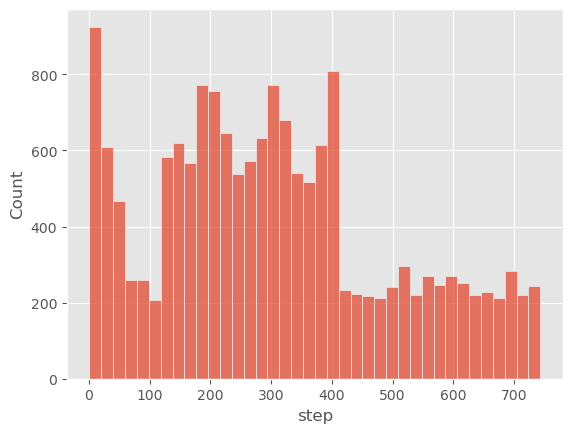

In [15]:
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

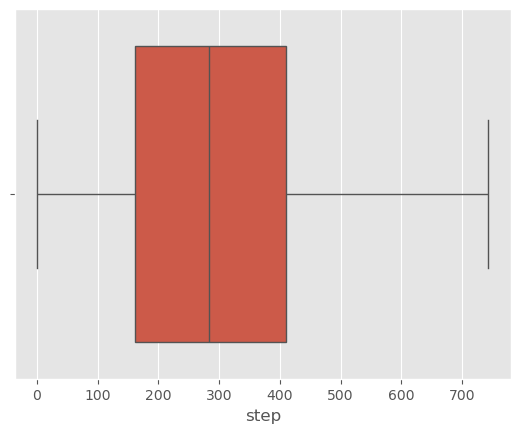

In [16]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

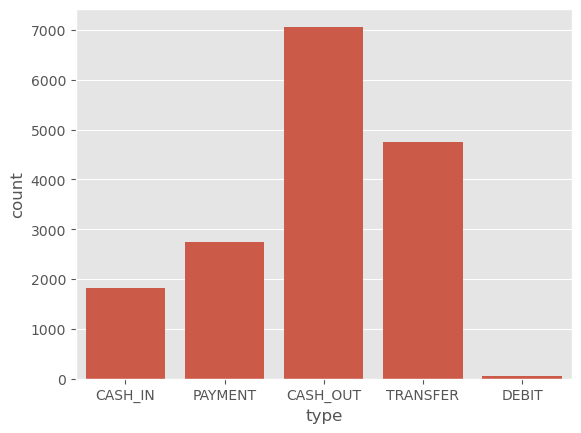

In [17]:
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

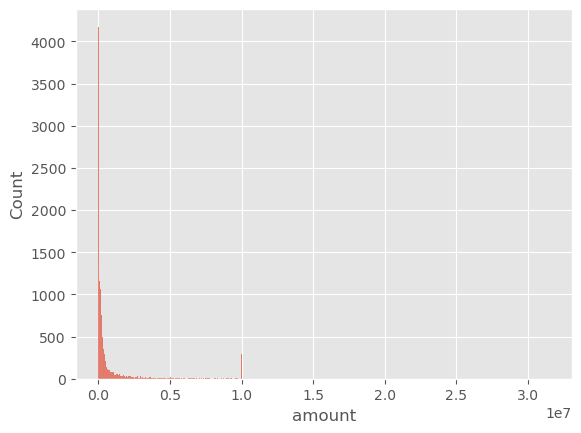

In [18]:
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

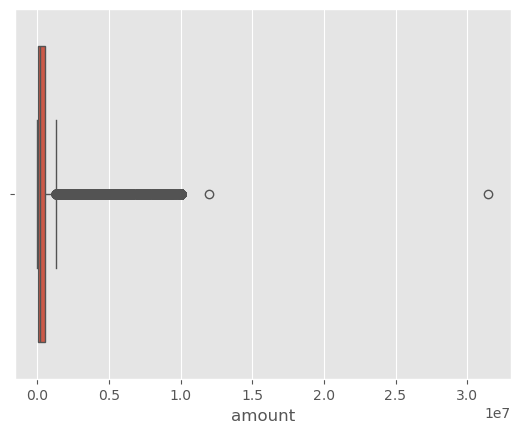

In [19]:
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

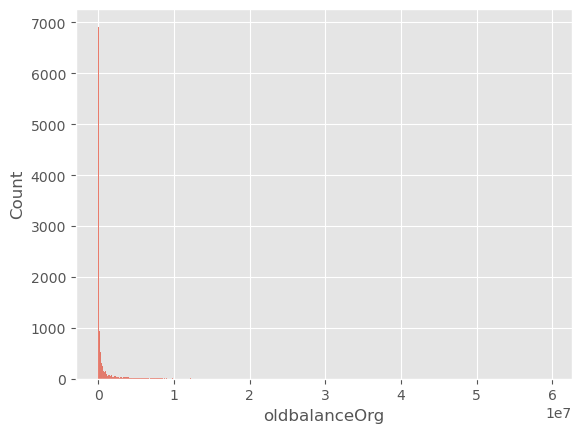

In [20]:
sns.histplot(data=df,x='oldbalanceOrg')

In [21]:
df['nameDest'].value_counts()

nameDest
C164033249     3
C1875540277    3
C2020337583    3
C1561140816    3
C1387576762    2
              ..
C1291527211    1
C1968032236    1
M11763761      1
C471258515     1
C1360574838    1
Name: count, Length: 16235, dtype: int64

<Axes: xlabel='oldbalanceDest'>

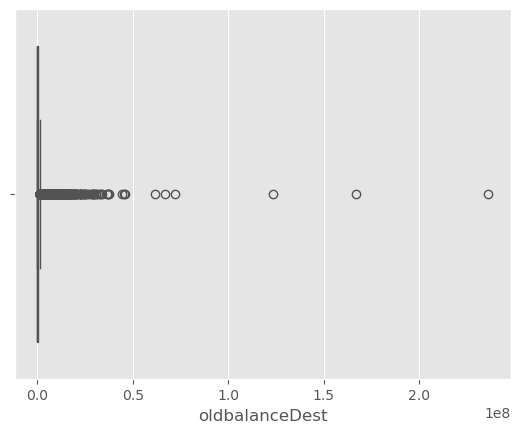

In [22]:
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

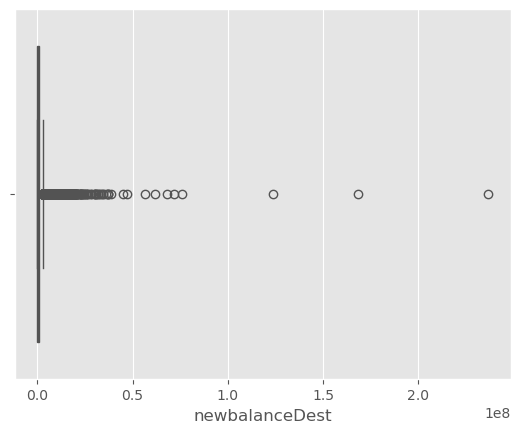

In [23]:
sns.boxplot(data=df,x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

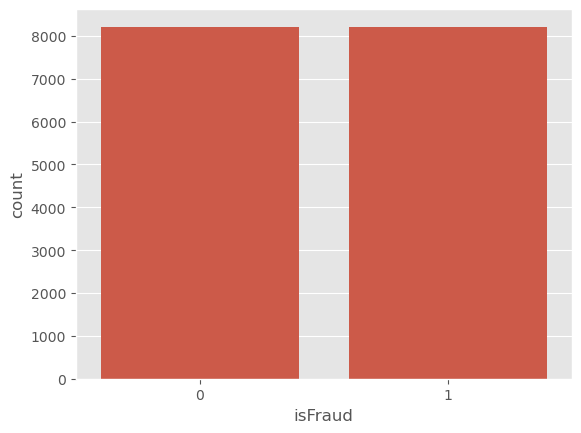

In [24]:
sns.countplot(data=df,x='isFraud')

In [25]:
df['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

In [26]:
df.loc[df['isFraud']==0,'isFraud'] = 'is not Fraud'
df.loc[df['isFraud'] ==1, 'isFraud']='is Fraud'

In [27]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,397,CASH_IN,76550.74,C658247527,1096252.93,1172803.66,C492670573,2208784.02,2132233.28,is not Fraud
1,251,PAYMENT,12617.11,C1812418129,339181.87,326564.76,M1924423059,0.00,0.00,is not Fraud
2,98,CASH_OUT,8055.06,C1544350298,8055.06,0.00,C912405348,0.00,8055.06,is Fraud
3,550,TRANSFER,342309.91,C662184778,342309.91,0.00,C1740503020,0.00,0.00,is Fraud
4,586,CASH_OUT,2581549.92,C648614053,2581549.92,0.00,C213455810,0.00,2581549.92,is Fraud
...,...,...,...,...,...,...,...,...,...,...
16421,382,CASH_OUT,542461.74,C664480557,0.00,0.00,C1725191429,1757516.20,2299977.94,is not Fraud
16422,40,CASH_IN,2032.93,C1544432489,7625673.00,7627705.93,C1918821785,323961.50,321928.56,is not Fraud
16423,484,CASH_OUT,156220.74,C389614238,156220.74,0.00,C643171110,0.00,156220.74,is Fraud
16424,71,TRANSFER,1871553.73,C677678546,1871553.73,0.00,C646623849,0.00,0.00,is Fraud


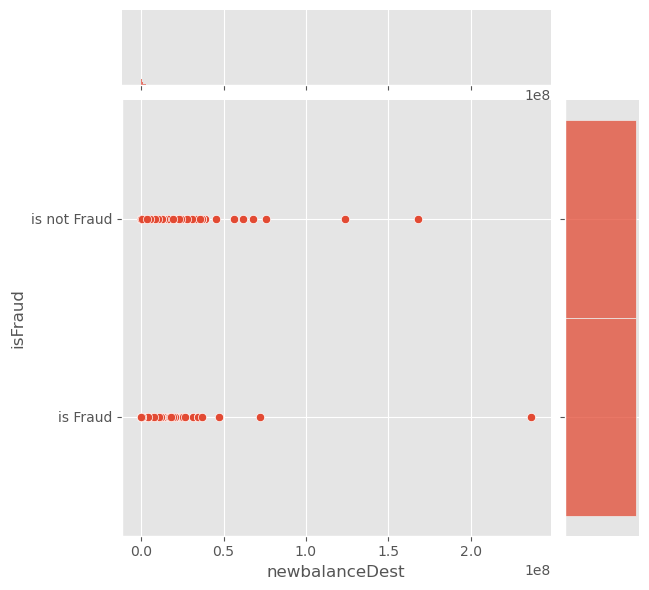

In [28]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='type', ylabel='count'>

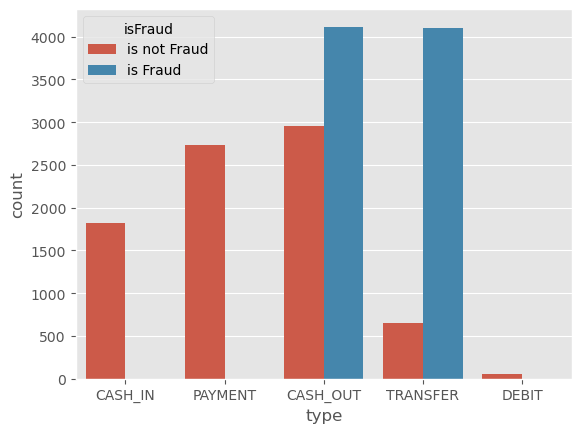

In [29]:
sns.countplot(data=df,x= 'type', hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

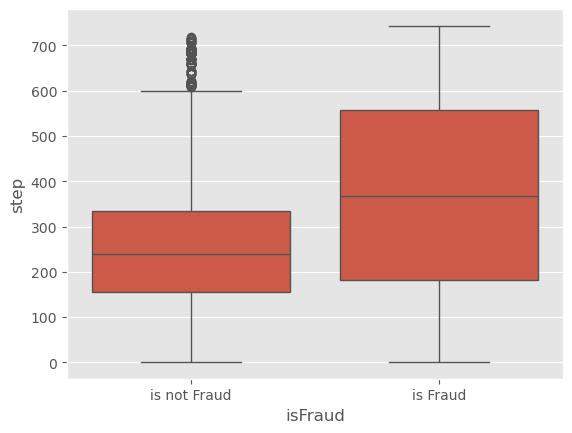

In [30]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

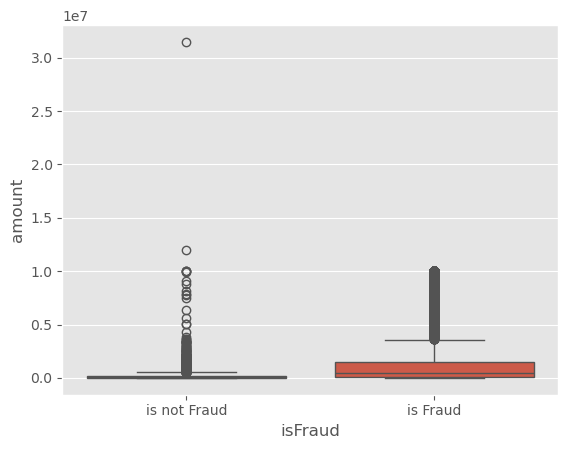

In [31]:
sns.boxplot(data=df,x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

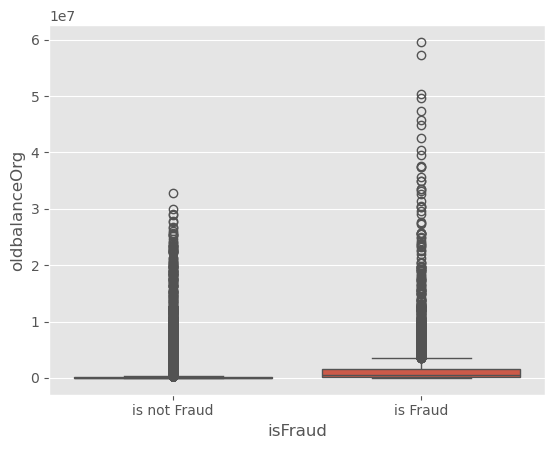

In [32]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

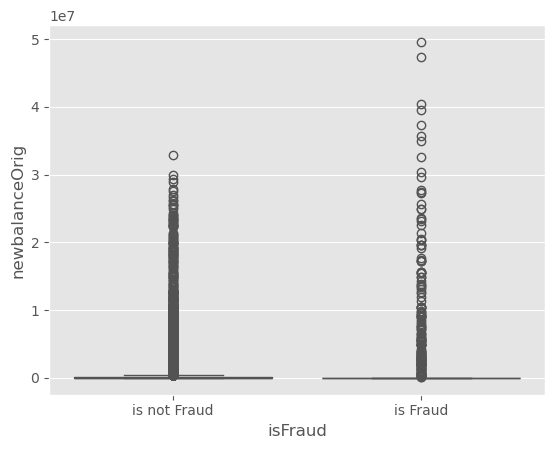

In [33]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

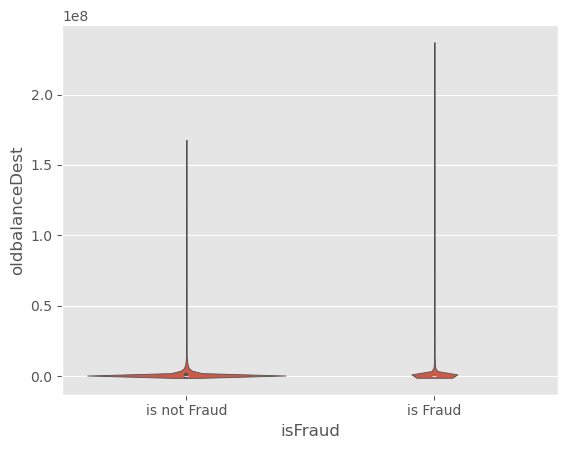

In [34]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

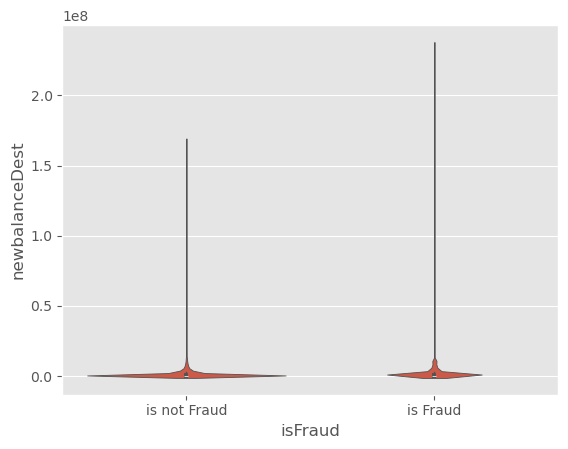

In [35]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')

In [36]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,16426.000000,16426,1.642600e+04,16426,1.642600e+04,1.642600e+04,16426,1.642600e+04,1.642600e+04,16426
unique,NaN,5,NaN,16426,NaN,NaN,16235,NaN,NaN,2
top,NaN,CASH_OUT,NaN,C658247527,NaN,NaN,C164033249,NaN,NaN,is not Fraud
freq,NaN,7066,NaN,1,NaN,NaN,3,NaN,NaN,8213
mean,306.441556,NaN,8.248655e+05,NaN,1.242838e+06,5.257872e+05,NaN,8.311948e+05,1.260807e+06,NaN
std,193.321590,NaN,1.862573e+06,NaN,3.252860e+06,2.505016e+06,NaN,3.484266e+06,3.864760e+06,NaN
min,1.000000,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,161.000000,NaN,3.815791e+04,NaN,1.035827e+04,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,283.000000,NaN,1.752676e+05,NaN,1.212709e+05,0.000000e+00,NaN,0.000000e+00,1.297782e+05,NaN
75%,410.000000,NaN,5.404362e+05,NaN,7.979333e+05,0.000000e+00,NaN,5.283537e+05,1.091986e+06,NaN


In [37]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


<Axes: ylabel='amount'>

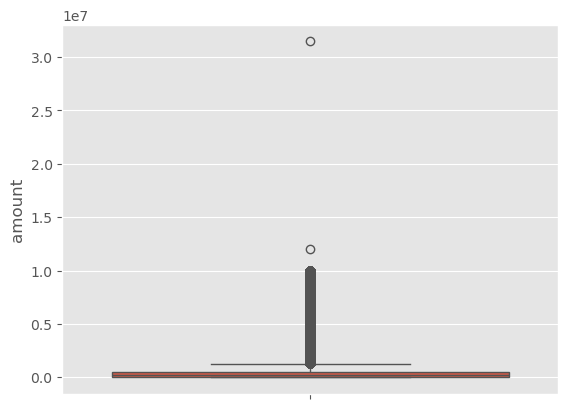

In [39]:
sns.boxplot (df['amount']) 

In [40]:
from scipy import stats 
print(stats.mode (df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=10000000.0, count=289)
824865.5166747839


In [41]:
q1=np.quantile (df['amount'], 0.25)
q3=np.quantile(df['amount'], 0.75)
IQR=q3-q1
upper_bound=q3+(1.5*IQR)
lower_bound=q1-(1.5*IQR)
print('q1',q1)
print('q3',q3)
print('IQR', IQR)
print('Upper Bound :',upper_bound)
print('Lower Bound :',lower_bound)
print('Skewed data :',len(df[df['amount']>upper_bound]))
print('Skewed data :',len(df[df['amount']<lower_bound]))

q1 38157.9125
q3 540436.215
IQR 502278.3025
Upper Bound : 1293853.66875
Lower Bound : -715259.54125
Skewed data : 2430
Skewed data : 0


In [42]:
df['amount']=np.log(df['amount'])

In [43]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
df['type'] = la.fit_transform(df['type'])
df['type'].value_counts()

type
1    7066
4    4750
3    2735
0    1825
2      50
Name: count, dtype: int64

In [44]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)
df = pd.get_dummies(df, columns=['type'], drop_first=True)
print(df.columns)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_1', 'type_2', 'type_3', 'type_4'],
      dtype='object')


In [45]:
x = df.drop('isFraud', axis=1)
y=df['isFraud']

In [46]:
x

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_1,type_2,type_3,type_4
0,397,11.245709,1096252.93,1172803.66,2208784.02,2132233.28,False,False,False,False
1,251,9.442809,339181.87,326564.76,0.00,0.00,False,False,True,False
2,98,8.994056,8055.06,0.00,0.00,8055.06,True,False,False,False
3,550,12.743472,342309.91,0.00,0.00,0.00,False,False,False,True
4,586,14.763901,2581549.92,0.00,0.00,2581549.92,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
16421,382,13.203873,0.00,0.00,1757516.20,2299977.94,True,False,False,False
16422,40,7.617233,7625673.00,7627705.93,323961.50,321928.56,False,False,False,False
16423,484,11.959025,156220.74,0.00,0.00,156220.74,True,False,False,False
16424,71,14.442280,1871553.73,0.00,0.00,0.00,False,False,False,True


In [47]:
y

0        is not Fraud
1        is not Fraud
2            is Fraud
3            is Fraud
4            is Fraud
             ...     
16421    is not Fraud
16422    is not Fraud
16423        is Fraud
16424        is Fraud
16425    is not Fraud
Name: isFraud, Length: 16426, dtype: object

In [48]:
print(df.columns)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_1', 'type_2', 'type_3', 'type_4'],
      dtype='object')


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(13140, 10)
(3286, 10)
(3286,)
(13140,)


In [51]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_test = x_test.apply(pd.to_numeric, errors='coerce')
x_train = x_train.replace([np.inf, -np.inf], np.nan)
x_test = x_test.replace([np.inf, -np.inf], np.nan)
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)

In [52]:
print("NaN values:\n", x_train.isnull().sum())
print("Infinity values:\n", np.isinf(x_train.astype(float).values).sum())

NaN values:
 step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
type_1            0
type_2            0
type_3            0
type_4            0
dtype: int64
Infinity values:
 0


In [53]:
df['amount'] = np.log1p(df['amount'])

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_test_predict1 = rfc.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_test_predict1))

Accuracy: 0.992696287279367


In [55]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score (y_train,y_train_predict1)
train_accuracy

1.0

In [56]:
pd.crosstab(y_test,y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1610,6
is not Fraud,18,1652


In [57]:
print(classification_report (y_test,y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       0.99      1.00      0.99      1616
is not Fraud       1.00      0.99      0.99      1670

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



In [58]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_test_predict2=dtc.predict(x_test) 
test_accuracy=accuracy_score (y_test,y_test_predict2)
test_accuracy

0.994826536822885

In [59]:
y_train_predict2=dtc.predict(x_train) 
train_accuracy=accuracy_score (y_train,y_train_predict2)
train_accuracy

1.0

In [60]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1610,6
is not Fraud,11,1659


In [61]:
print(classification_report (y_test,y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       0.99      1.00      0.99      1616
is not Fraud       1.00      0.99      0.99      1670

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



In [62]:
from sklearn.ensemble import ExtraTreesClassifier 
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_test_predict3=etc.predict(x_test)
test_accuracy=accuracy_score (y_test,y_test_predict3)
test_accuracy

0.9881314668289713

In [63]:
y_train_predict3=etc.predict(x_train) 
train_accuracy=accuracy_score (y_train,y_train_predict3)
train_accuracy

1.0

In [64]:
pd.crosstab(y_test,y_test_predict3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1599,17
is not Fraud,22,1648


In [65]:
print(classification_report (y_test,y_test_predict3))

              precision    recall  f1-score   support

    is Fraud       0.99      0.99      0.99      1616
is not Fraud       0.99      0.99      0.99      1670

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



In [66]:
y_train1 = y_train.map({'is not Fraud':0, 'is Fraud':1})
y_test1 = y_test.map({'is not Fraud':0, 'is Fraud':1})

In [67]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier() 
xgb1.fit(x_train, y_train1)
y_test_predict5=xgb1.predict(x_test) 
test_accuracy=accuracy_score (y_test1,y_test_predict5)
test_accuracy

0.994826536822885

In [68]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score (y_train1,y_train_predict5)
train_accuracy

0.9998477929984779

In [69]:
pd.crosstab(y_test,y_test_predict5)

col_0,0,1
isFraud,,
is Fraud,4,1612
is not Fraud,1657,13


In [70]:
y_train_predict5=xgb1.predict(x_train) 
train_accuracy=accuracy_score (y_train1,y_train_predict5)
train_accuracy

0.9998477929984779

In [71]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test) 
test_accuracy=accuracy_score (y_test,y_test_predict4)
test_accuracy

0.8326232501521607

In [72]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score (y_train,y_train_predict4)
train_accuracy


0.8358447488584475

In [73]:
pd.crosstab(y_test,y_test_predict4)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1094,522
is not Fraud,28,1642


In [74]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report (y_test,y_test_predict4))

              precision    recall  f1-score   support

    is Fraud       0.98      0.68      0.80      1616
is not Fraud       0.76      0.98      0.86      1670

    accuracy                           0.83      3286
   macro avg       0.87      0.83      0.83      3286
weighted avg       0.87      0.83      0.83      3286



In [75]:
df.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_1', 'type_2', 'type_3', 'type_4'],
      dtype='object')

In [76]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder()
y_train1=la.fit_transform(y_train)

In [77]:
y_test1=la.transform(y_test)

In [78]:
y_test1

array([0, 0, 1, ..., 1, 0, 1])

In [79]:
y_train1

array([0, 0, 1, ..., 1, 1, 0])

In [80]:
def compareModel():
    print("train accuracy for rfc", accuracy_score (y_train_predict1,y_train)) 
    print("test accuracy for rfc", accuracy_score (y_test_predict1,y_test)) 
    print("train accuracy for dtc", accuracy_score (y_train_predict2,y_train))
    print("test accuracy for dtc", accuracy_score (y_test_predict2,y_test)) 
    print("train accuracy for etc", accuracy_score (y_train_predict3,y_train)) 
    print("test accuracy for etc", accuracy_score (y_test_predict3,y_test)) 
    print("train accuracy for svc", accuracy_score (y_train_predict4,y_train)) 
    print("test accuracy for svcc", accuracy_score (y_test_predict4,y_test))
    print("train accuracy for xgb1", accuracy_score (y_train_predict5,y_train1))
    print("test accuracy for xgb1", accuracy_score (y_test_predict5,y_test1))
compareModel()

train accuracy for rfc 1.0
test accuracy for rfc 0.992696287279367
train accuracy for dtc 1.0
test accuracy for dtc 0.994826536822885
train accuracy for etc 1.0
test accuracy for etc 0.9881314668289713
train accuracy for svc 0.8358447488584475
test accuracy for svcc 0.8326232501521607
train accuracy for xgb1 0.00015220700152207003
test accuracy for xgb1 0.005173463177115033


In [81]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
svc= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score (y_test,y_test_predict4)
test_accuracy

0.8326232501521607

In [82]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score (y_train,y_train_predict4)
train_accuracy

0.8358447488584475

In [85]:
import pickle
pickle.dump(rfc, open('payments.pkl', 'wb'))

In [84]:
print(x.columns)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_1', 'type_2', 'type_3', 'type_4'],
      dtype='object')


In [87]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_test_predict1))
print(classification_report(y_test, y_test_predict1))

[[1610    6]
 [  18 1652]]
              precision    recall  f1-score   support

    is Fraud       0.99      1.00      0.99      1616
is not Fraud       1.00      0.99      0.99      1670

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

